# Bonus Assignment
### Data Visualization for GitHub Issues


# GitHub

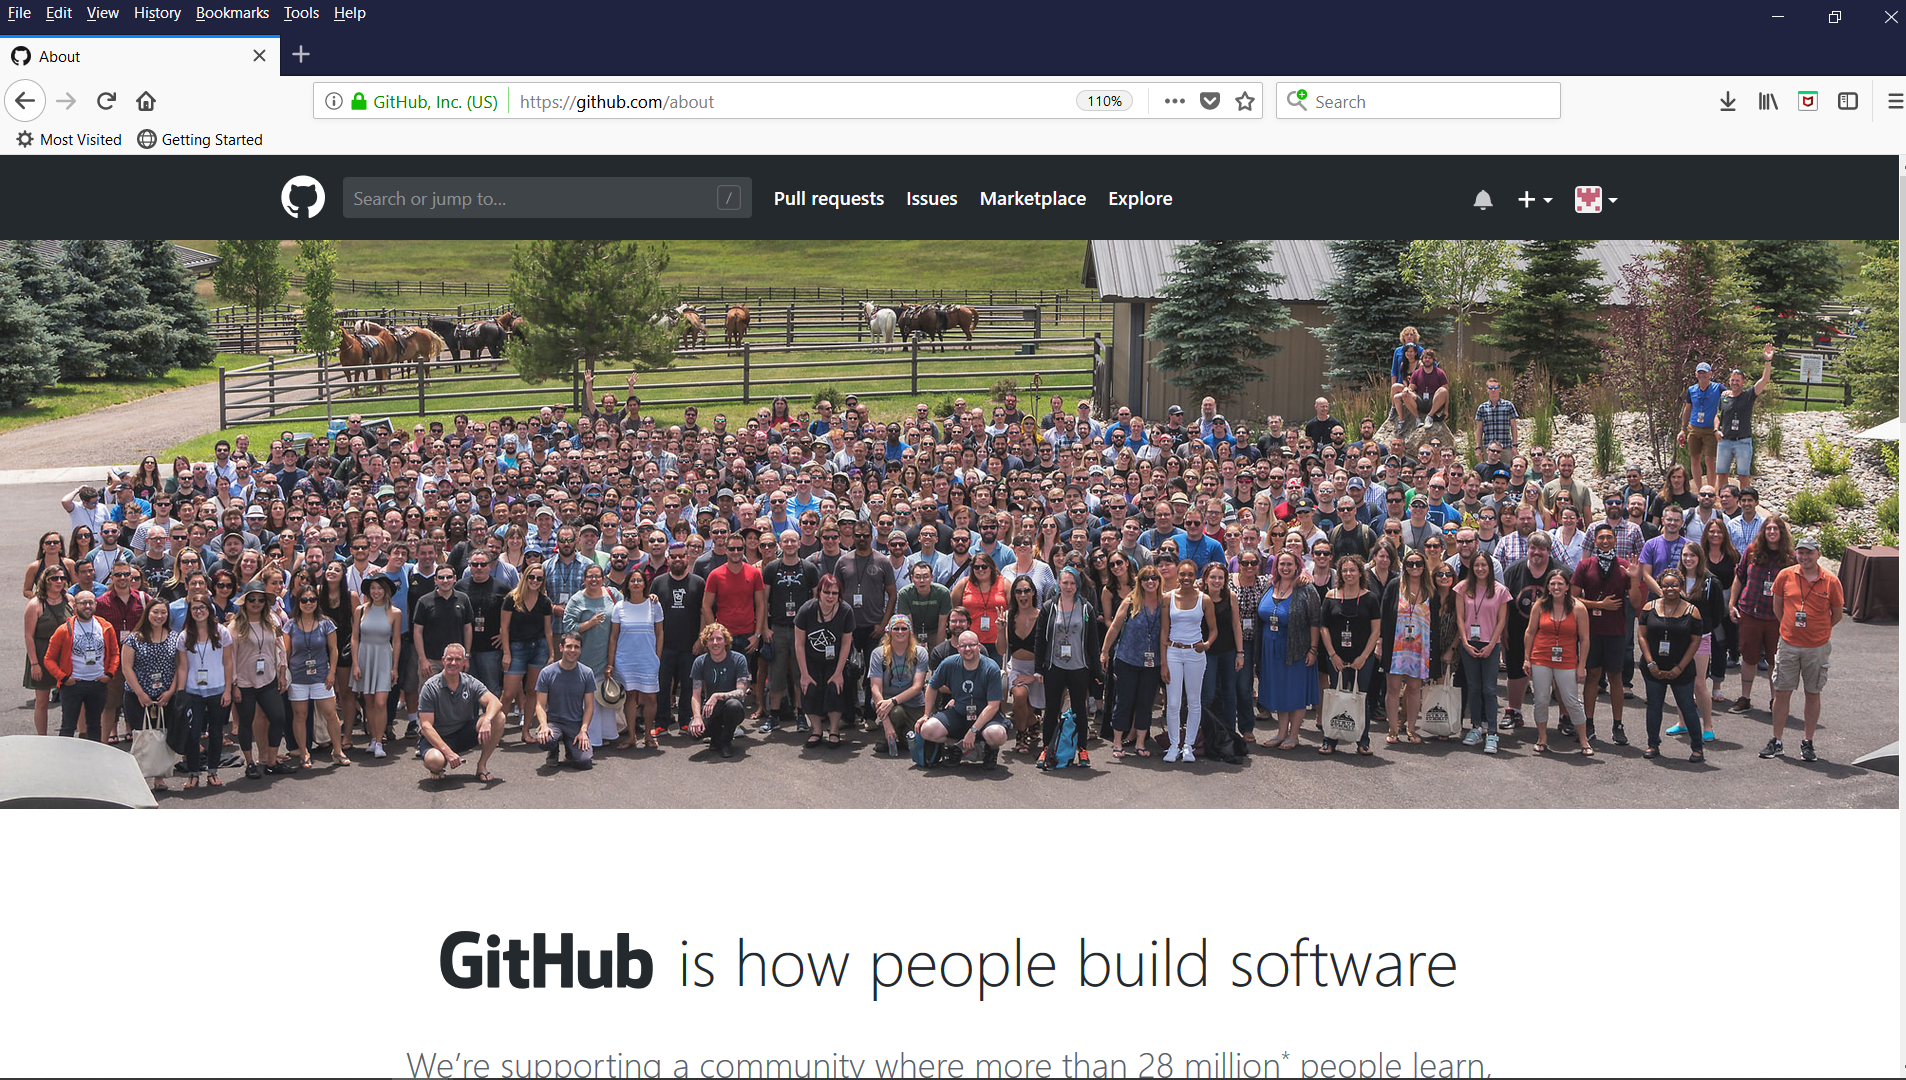

# Deliverables:

- Submit a single zip-compressed file that has the name: YourLastName_Bonus_Assignment_1 that has the following files:

 1. Your **PDF document** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output


# Objectives:

- Learn how to process data  stored in **JSON** file
- Learn how to visualize data in **Stacked Chart** 
- Learn how to plot data on **HeatMap** 



# Submission Formats :

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or any other compression method.)


1. Complete IPYNB script that has the source code in Python used to access and analyze the data. The code should be submitted as an IPYNB script that can be be loaded and run in Jupyter Notebook for Python
2. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. 
3. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code:
http://pep8.org/ (Links to an external site.)Links to an external site.
There is the Google style guide for Python at
https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site.
Comment often and in detail.




# GitHub Facts

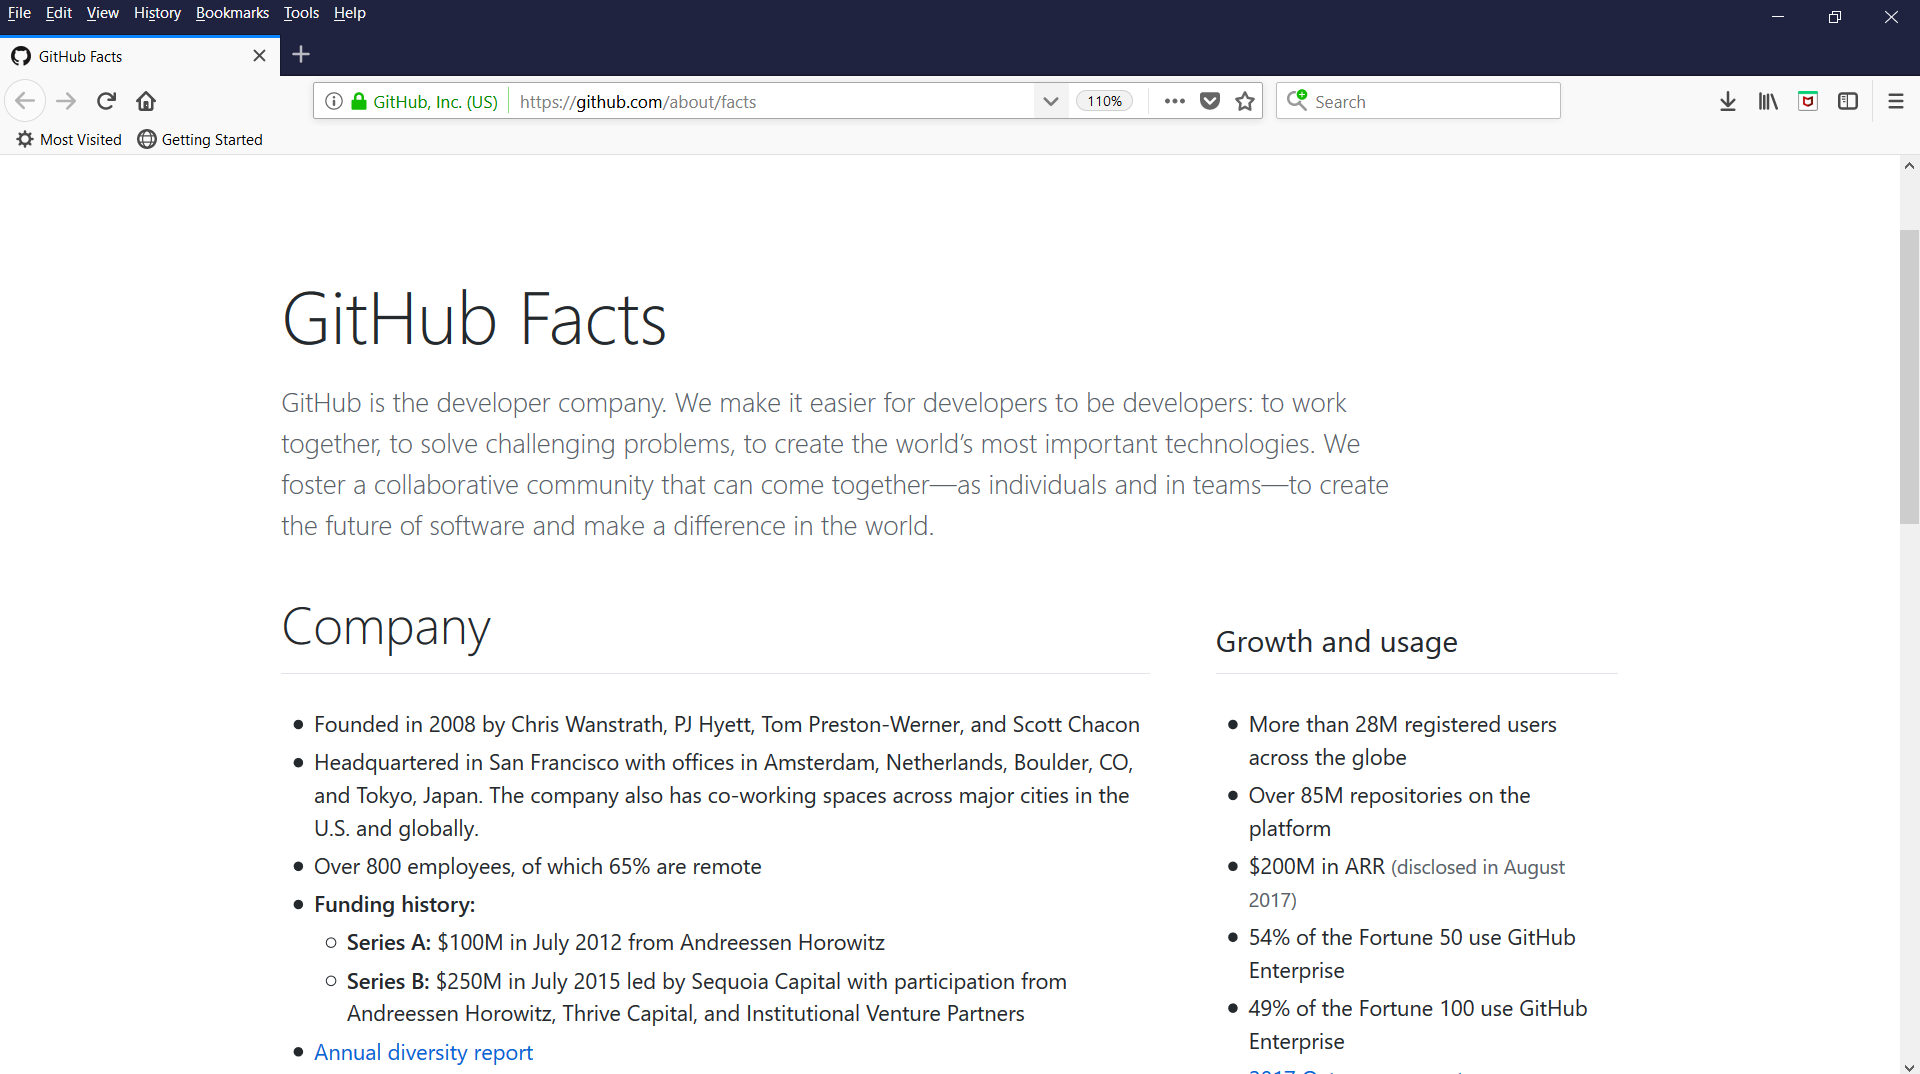

# Microsoft acquired GitHub for $7.5 Billion in 2018

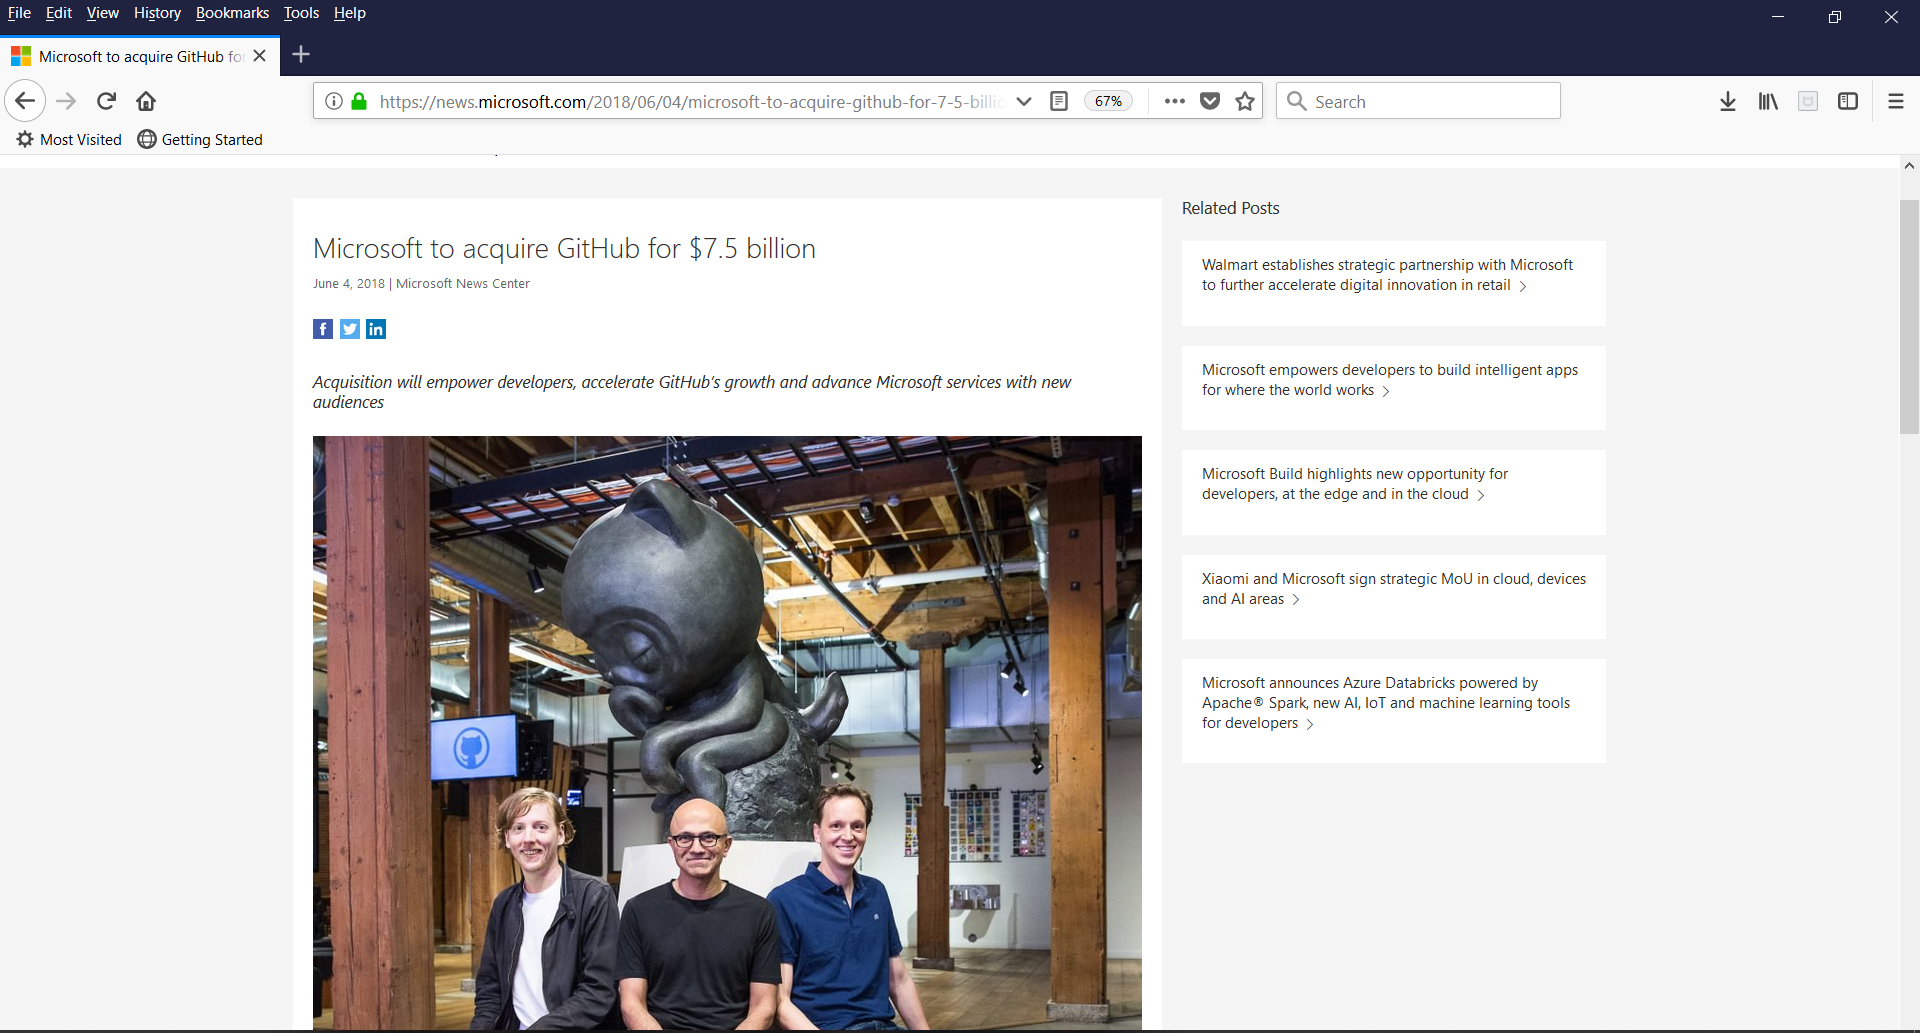

# Documentation of GitHub Issues

Tutorial and Documentation on how issues are created and managed on GitHub can be found at this URL : 


 __[Managing GitHub Issues](https://help.github.com/categories/managing-your-work-on-github/)__ 
 

# Data Viualization for GitGub Issues

In this assignment you will learn how to plot the Graph for sample data of GitHub issues with different labels created and closed on different dates for a sample of data created for experimental purposes on GitHub

### Examples of Issue Form Filled out

### Data Set File:  issues.json

In [1]:
import os

import _pickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Reading the Dataset stored in JSON file : 
Lets read the  issues from the JSON file  and plot them in a stacked chart

In [2]:
# Read the JSON file and load the data into a list of dictionaries

import json

list_of_issues_dict_data = [json.loads(line) for line in open('GitHub_issues.json')]

In [3]:
list_of_issues_dict_data[0].keys()

dict_keys(['issue_number', 'created_at', 'closed_at', 'labels', 'State', 'Author'])

In [4]:
list_of_issues_dict_data

[{'issue_number': 803,
  'created_at': '2018-04-02',
  'closed_at': '2018-04-09',
  'labels': ['Address:2525 S Martin Luther King Drive',
   'Category:Bug',
   'DetectionPhase:Testing',
   'Latitude:41.853136',
   'Longitude:-87.633160',
   'OriginationPhase:Design',
   'Priority:Critical',
   'Status:Rejected'],
  'State': 'closed',
  'Author': 'SPM587SP18'},
 {'issue_number': 802,
  'created_at': '2018-03-30',
  'closed_at': '2018-04-06',
  'labels': ['Address:2525 S Martin Luther King Drive',
   'Category:Bug',
   'DetectionPhase:Testing',
   'Latitude:41.853136',
   'Longitude:-87.633160',
   'OriginationPhase:Design',
   'Priority:Critical',
   'Status:Rejected'],
  'State': 'closed',
  'Author': 'SPM587SP18'},
 {'issue_number': 894,
  'created_at': '2018-05-10',
  'closed_at': '2018-08-10',
  'labels': ['Address:111 W JACKSON',
   'Category:Bug',
   'DetectionPhase:Design',
   'Latitude:41.877817',
   'Longitude:-87.631247',
   'OriginationPhase:Requirements',
   'Priority:Medium

In [5]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [6]:
issues_df.keys()

Index(['issue_number', 'created_at', 'closed_at', 'labels', 'State', 'Author'], dtype='object')

In [7]:
issues_df.dtypes

issue_number     int64
created_at      object
closed_at       object
labels          object
State           object
Author          object
dtype: object

In [8]:
# Sanity test: print first 5 rows in our DataFrame

issues_df.head()
    

issue_number  created_at   closed_at  \
0           803  2018-04-02  2018-04-09   
1           802  2018-03-30  2018-04-06   
2           894  2018-05-10  2018-08-10   
3           891  2018-04-10  2018-08-11   
4           888  2018-06-10  2018-08-11   

                                              labels   State        Author  
0  [Address:2525 S Martin Luther King Drive, Cate...  closed    SPM587SP18  
1  [Address:2525 S Martin Luther King Drive, Cate...  closed    SPM587SP18  
2  [Address:111 W JACKSON, Category:Bug, Detectio...  closed  PEngineer54P  
3  [Address:1919 Dempster Street, Category:Bug, D...  closed  PEngineer99P  
4  [Address:1919 Dempster Street, Category:Bug, L...  closed  JEngineer54B

In [9]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN

wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Address']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Latitude']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Longitude']= np.NaN



In [10]:
#Sanity test the content of the datframe object

wrangled_issues_df.head()

Author   State   closed_at  created_at  issue_number  \
0    SPM587SP18  closed  2018-04-09  2018-04-02           803   
1    SPM587SP18  closed  2018-04-06  2018-03-30           802   
2  PEngineer54P  closed  2018-08-10  2018-05-10           894   
3  PEngineer99P  closed  2018-08-11  2018-04-10           891   
4  JEngineer54B  closed  2018-08-11  2018-06-10           888   

   OriginationPhase  DetectionPhase  Category  Priority  Status  Address  \
0               NaN             NaN       NaN       NaN     NaN      NaN   
1               NaN             NaN       NaN       NaN     NaN      NaN   
2               NaN             NaN       NaN       NaN     NaN      NaN   
3               NaN             NaN       NaN       NaN     NaN      NaN   
4               NaN             NaN       NaN       NaN     NaN      NaN   

   Latitude  Longitude  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN

In [11]:
# we need to create a list of the key:value pairs in labels

for i in range(0, len(issues_df)):
    
    if issues_df.iloc[i]['labels']:
        for label in issues_df.iloc[i]['labels']:
#            print(label)
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [12]:
#Sanity test the content of the datframe object

wrangled_issues_df.head(50)

Author   State   closed_at  created_at  issue_number  \
0     SPM587SP18  closed  2018-04-09  2018-04-02           803   
1     SPM587SP18  closed  2018-04-06  2018-03-30           802   
2   PEngineer54P  closed  2018-08-10  2018-05-10           894   
3   PEngineer99P  closed  2018-08-11  2018-04-10           891   
4   JEngineer54B  closed  2018-08-11  2018-06-10           888   
5   CEngineer41G  closed  2018-06-11  2018-04-10           887   
6   AEngineer91K  closed  2018-06-11  2018-03-10           886   
7   KEngineer68P  closed  2018-06-11  2018-04-10           882   
8   PEngineer48S  closed  2018-06-10  2018-05-10           881   
9   SEngineer01V  closed  2018-06-10  2018-05-10           880   
10  REngineer13S  closed  2018-04-11  2018-04-10           879   
11  MEngineer47B  closed  2018-04-11  2018-02-10           878   
12  PEngineer54P  closed  2018-04-10  2018-04-10           694   
13  PEngineer99P  closed  2018-04-11  2018-02-10           691   
14  JEngineer54B  closed  2018-04-11  2018-04-10           688   
15  CEngineer41G  closed  2018-04-11  2018-02-10           687   
16  AEngineer91K  closed  2018-04-11  2018-04-10           686   
17  KEngineer68P  closed  2018-04-11  2018-04-10           682   
18  PEngineer48S  closed  2018-04-10  2018-04-10           681   
19  SEngineer01V  closed  2018-04-10  2018-04-10           680   
20  REngineer13S  closed  2018-04-11  2018-01-10           679   
21  MEngineer47B  closed  2018-04-11  2018-04-10           678   
22  SEngineer01V  closed  2018-04-10  2018-04-10           677   
23  PEngineer73A  closed  2018-04-10  2018-02-10           675   
24  KEngineer22B  closed  2018-04-11  2018-02-10           670   
25  SEngineer86K  closed  2018-04-10  2018-04-10           667   
26  JEngineer08Y  closed  2018-04-10  2018-03-10           664   
27  MEngineer38Y  closed  2018-04-11  2018-04-09           661   
28  HEngineer23P  closed  2018-04-10  2018-04-09           660   
29  PEngineer08M  closed  2018-04-10  2018-04-09           658   
30  YEngineer46Z  closed  2018-04-10  2018-04-09           657   
31  AEngineer50W  closed  2018-04-22  2018-04-20           575   
32  AEngineer50W  closed  2018-04-22  2018-04-19           574   
33  AEngineer40K  closed  2018-04-14  2018-04-14           572   
34  AEngineer19N  closed  2018-04-14  2018-04-14           570   
35  AEngineer32L  closed  2018-04-13  2018-04-13           566   
36  AEngineer19N  closed  2018-04-13  2018-04-13           564   
37  MEngineer65B  closed  2018-04-13  2018-04-13           561   
38  YEngineer35Z  closed  2018-04-13  2018-04-13           554   
39  HEngineer50W  closed  2018-04-22  2018-04-20           475   
40  HEngineer50W  closed  2018-04-22  2018-04-19           474   
41  YEngineer40K  closed  2018-04-14  2018-04-14           472   
42  REngineer19N  closed  2018-04-14  2018-04-14           470   
43  CEngineer32L  closed  2018-04-13  2018-04-13           466   
44  REngineer19N  closed  2018-04-13  2018-04-13           464   
45  MEngineer65B  closed  2018-04-13  2018-03-13           461   
46  YEngineer35Z  closed  2018-04-13  2018-04-13           454   
47  YEngineer40K  closed  2018-04-13  2018-04-13           452   
48  ZEngineer44L  closed  2018-04-13  2018-03-13           449   
49  DEngineer14S  closed  2018-04-13  2018-04-13           447   

   OriginationPhase DetectionPhase     Category  Priority         Status  \
0            Design        Testing          Bug  Critical       Rejected   
1            Design        Testing          Bug  Critical       Rejected   
2      Requirements         Design          Bug    Medium       Approved   
3            Design         Design          Bug    Medium  pendingReview   
4               NaN            NaN          Bug       NaN            NaN   
5            Design         Design          Bug  Critical       Approved   
6      Requirements         Design          Bug    Medium  pendingReview   
7            Design         Design 

### Plot in Stacked Bar Chart the total number of issues created every day for every Detaction Phase


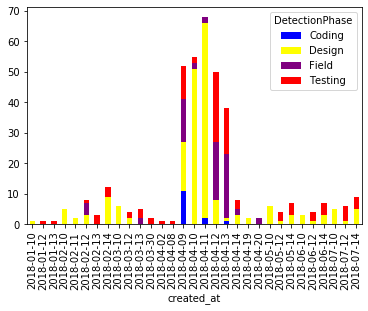

In [13]:

github_issues_by_date_created_detectionphase = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

github_issues_by_date_created_detectionphase_fig = github_issues_by_date_created_detectionphase.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

### Plot in Stacked Bar Chart the total number of issues created for detection Phase based on thier priorites


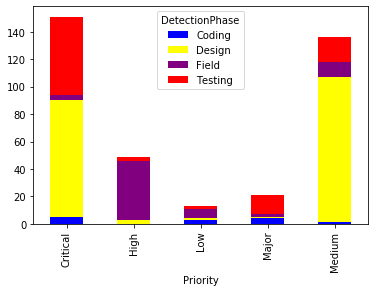

In [14]:
# Plot in Stacked Bar Chart the total number of issues created for detection Phase based on thier priorites

github_issues_by_priority_detectionphase = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

github_issues_by_priority_detectionphase_fig = github_issues_by_priority_detectionphase.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

### Plot in Stacked Bar Chart the total number of issues closed every day for every Category


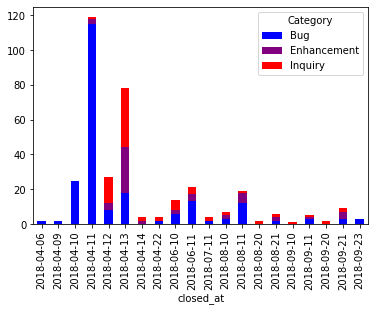

In [15]:

github_issues_by_closed_date_category = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

github_issues_by_closed_date_category_fig = github_issues_by_closed_date_category.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)

# Lets plot the issues on a HeatMap

We will use Folium HeatMap to plot on a HeatMap our GitHub issues using Latitude and Longitude pairs. Here is the API documentation for Folium/HeatMap 

 __[Folium/HeatMap API](http://python-visualization.github.io/folium/docs-v0.5.0/plugins.html)__ 

Here is the command that you execute from the terminal window in order to install Folium:
 
- conda install -c conda-forge folium


In [16]:

import folium
from folium import plugins

In [17]:
# Lets take a VERTICAL SLICE  ['Latitude','Longitude'] of the dataframe object

df_lat_lng = wrangled_issues_df[['Latitude','Longitude']]

In [18]:
#Sanity test the content of the datframe object

df_lat_lng.head()

Latitude   Longitude
0  41.853136  -87.633160
1  41.853136  -87.633160
2  41.877817  -87.631247
3  42.041392  -87.700113
4  42.041392  -87.700113

In [19]:
# Lets create a list of ['Latitude','Longitude'] pairs to feed into the HeatMap object

github_issues_coord = []

for i in range(0, len(df_lat_lng)):
    location_ll = []
    if ( pd.notnull(df_lat_lng.iloc[i]['Latitude']) and  pd.notnull(df_lat_lng.iloc[i]['Longitude'])):
#        print(df_lat_lng.iloc[i]['Latitude'], df_lat_lng.iloc[i]['Longitude'])
        location_ll.append(float(df_lat_lng.iloc[i]['Latitude']))
        location_ll.append(float(df_lat_lng.iloc[i]['Longitude']))
        github_issues_coord.append(location_ll)
        

In [20]:
github_issues_heat_map = folium.Map([41.891551, -87.607375],zoom_start = 16)
github_issues_heat_map.add_child(plugins.HeatMap(github_issues_coord,radius=15))

# interact with the map below by zooming in/out
# Experiment with zoom_start and radius parameters of the HeatMap by using differen values

#  Requirement #1: 

Plot in Stacked Bar Chart the total number of issues closed every day for every Origination Phase


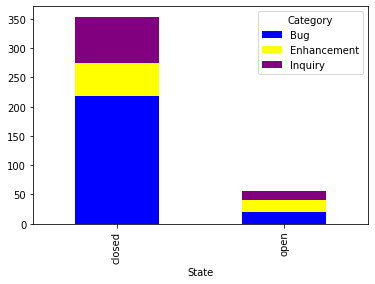

In [21]:
github_issues_by_date_created_originationPhase = wrangled_issues_df.groupby(['State','Category']).created_at.count()
github_issues_by_date_created_riginationPhase_fig = github_issues_by_date_created_originationPhase.unstack().plot(kind='bar',stacked=True, color=['blue','yellow', 'purple', 'red', 'green','black'], grid=False)

#  Requirement #2:  

Create two bar charts: 

1) Plot in stacked bar chart the total number of issues created for Origination Phase based on status 

2) Plot in stacked bar chart the total number of issues created for Detection Phase based on status​



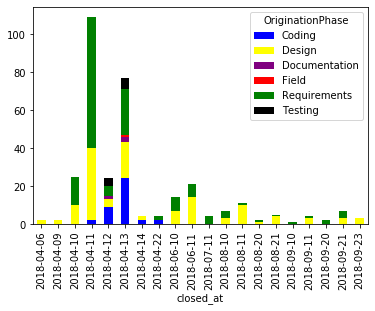

In [22]:
github_issues_by_date_created_originationPhase = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()
github_issues_by_date_created_riginationPhase_fig = github_issues_by_date_created_originationPhase.unstack().plot(kind='bar',stacked=True, color=['blue','yellow', 'purple', 'red', 'green','black'], grid=False)


#  Requirement #3: 

Create Folium HeatMap for issues that have Priority equals to  Critical

"Priority:Critical"

In [23]:
data1=wrangled_issues_df['issue_number'].groupby(wrangled_issues_df['Priority']=="Critical").count()

In [24]:
data1
#data = data1.as_matrix(['Latitude','Longitude']).tolist()


Priority
False    252
True     158
Name: issue_number, dtype: int64

In [25]:
from folium.plugins import HeatMap
HeatMap(data)



NameError: name 'data' is not defined

#  Requirement #4: 

Create Folium HeatMap for issues that have Priority equals to Critical or
High AND Status is Approved or inProgress


In [ ]:
data1=wrangled_issues_df['issue_number'].groupby(wrangled_issues_df['Priority']=="Critical||Hight").count()
data2=wrangled_issues_df['issue_number'].groupby(wrangled_issues_df['Status']=="Approved").count()

In [ ]:
data1
data2

In [ ]:
from folium.plugins import HeatMap

HeatMap(data1)
HeatMap(data2)


#  Requirement #5: 

Create Folium HeatMap for issues that have Field as the DetectionPhase and created during the month of April, 2018.

In [26]:
data1=wrangled_issues_df['DetectionPhase'].groupby(['created_at']=="2018-04-10").count()

KeyError: False

In [27]:
2018-04-10	

SyntaxError: invalid token (<ipython-input-27-6642393f69f6>, line 1)